# Underfitting and Overfitting


In [0]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [0]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Segregating dependent, independent

In [0]:
#seperating independent and dependent variables

x = data.drop(['Survived'], axis=1)
y = data['Survived']

#### Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Image 1

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y)

### Implementing KNN

In [0]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [11]:
# Creating instance of KNN
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training F1 Score', k )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Training F1 Score 0.8209255533199196
Test F1 Score     0.7080745341614907


### Checking the Training F1 and Test F1curve

In [0]:
def F1score(K):
  '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
  '''
  # initiating empty list
  train_f1 = []
  test_f1 = []
  
  # training model for evey value of K
  for i in K:
     # Instance oh KNN
    clf  = KNN(n_neighbors = i)
    clf.fit(train_x, train_y)
    # Appending F1 scores to empty list claculated using the predictions
    tmp = clf.predict(train_x)
    tmp = f1_score(tmp,train_y)
    train_f1.append(tmp)
    
    tmp = clf.predict(test_x)
    tmp = f1_score(tmp,test_y)
    test_f1.append(tmp)
    
  return train_f1, test_f1

In [0]:
#Defining K range
k = range(1,150)

In [0]:
# calling above defined function
train, test = F1score(k)

In [15]:
score = pd.DataFrame({'train score': train, 'test score': test}, index = k)
score

,test score,train score
1,0.701149,0.976654
2,0.595745,0.804651
3,0.708075,0.820926
4,0.628571,0.773034
5,0.675497,0.771784
6,0.680851,0.746067
7,0.738255,0.758763
8,0.708333,0.751620
9,0.721088,0.754717
10,0.708333,0.716216


### Visualizing

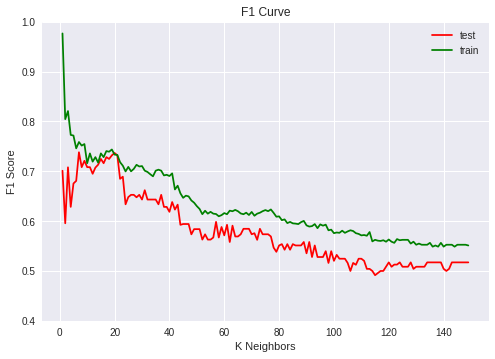

In [16]:
# plotting the Curves
plt.plot(k, test, color = 'red' , label = 'test')
plt.plot(k, train, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

# Image 2 Students

# Question Pop and Video Break

# Challenges with Test set

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 0, stratify = y)

In [0]:
# calling above defined function
k = range(1,50)
train, test = F1score(k)

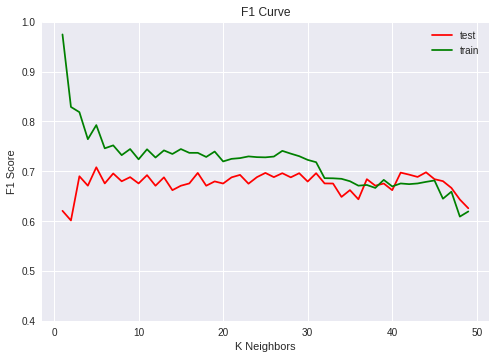

In [28]:
# plotting the Curves
plt.plot(k, test, color = 'red' , label = 'test')
plt.plot(k, train, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

# Image 3 and end video